In [1]:
import density_matrix_tool as dmt
import projectors_tQST_local as prj
import projectors_tQST_for_noise as prj2
import counts_tQST_for_noise as cnt
from maximum_likelihood import *

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:319: SyntaxWarning: invalid escape sequence '\p'
  cbar.ax.set_yticklabels(['-$\pi$', '-3$\pi$/4', '-$\pi$/2 ', '-$\pi$/4', '0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$',])
c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:319: SyntaxWarning: invalid escape sequence '\p'
  cbar.ax.set_yticklabels(['-$\pi$', '-3$\pi$/4', '-$\pi$/2 ', '-$\pi$/4', '0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$',])
c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:319: SyntaxWarning: invalid escape sequence '\p'
  cbar.ax.set_yticklabels(['-$\pi$', '-3$\pi$/4', '-$\pi$/2 ', '-$\pi$/4', '0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$',])
c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:319: SyntaxWarning: invalid escape sequence '\p'
  cbar.ax.set_yticklabels(['-$\pi$', '-3$\pi$/4', '-$\pi$/2 '

# GHZ states
Here we compare tQST without counter-noise strategies, denoising operators, and "banded" projectors only for GHZ states.

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


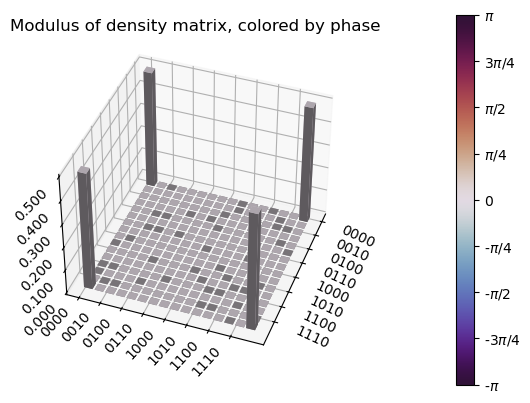

DDDD
DDDR
Number of measurements: 18
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


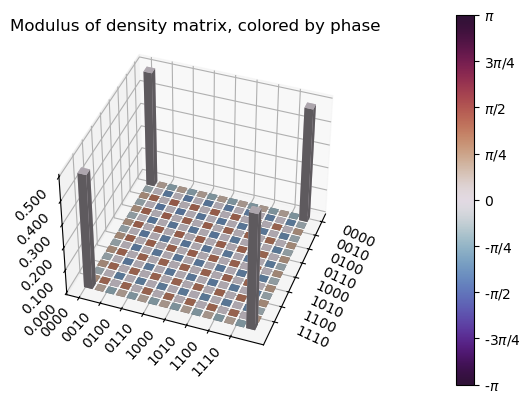

Fidelity with respect to target state: 0.99721753885698


In [5]:
# STANDARD

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
rho = dmt.density_matrix_GHZ(nqubit)

C = cnt.Counts_tQST(P)
C.set_density_matrix(rho)

t = dmt.gini_index(np.real(np.diagonal(rho)))
dmt.plot_density_matrix_3D(rho)

mel = C.get_matrix_elements_tQST(t)
# print(mel)

for x in mel[16:]:
    print(P.projector_name_from_matrix_element(*x))

nmeas = len(mel)
print('Number of measurements:', nmeas)

projs, counts = C.get_counts_from_mat_el(mel)

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
dmt.plot_density_matrix_3D(rho_reconstructed)
print('Fidelity with respect to target state:', dmt.fidelity(rho, rho_reconstructed))

# loading from Optimized_projectors[2, 2, 2, 2]


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


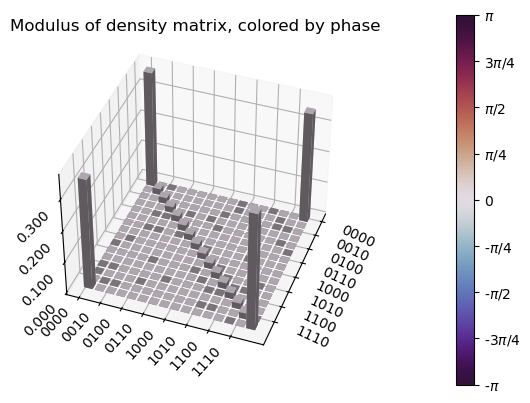

138
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\qlab\qlab\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


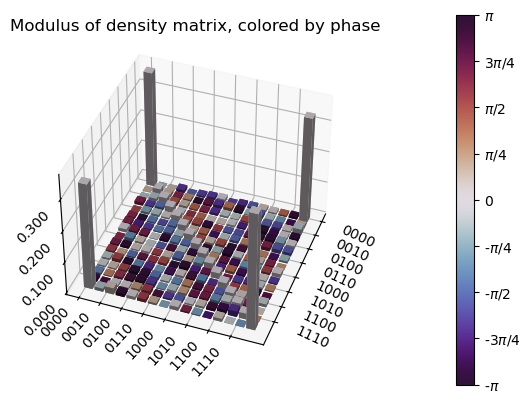

Fidelity with respect to the ideal state: 0.8388941212569767
Fidelity with respect to noisy state: 0.9299597188629203


In [7]:
# DENOISING

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
P2 = prj2.OptimizedProjectors_tQST([2]*nqubit)
rho = dmt.density_matrix_GHZ(nqubit)
k = 0.3
noisy_rho = rho * (1-k) + k/16 * np.identity(16)

C2 = cnt.Counts_tQST(P2)
# C2.set_density_matrix(rho)
C2.set_density_matrix(noisy_rho)
dmt.plot_density_matrix_3D(noisy_rho)

t = dmt.gini_index(np.real(np.diagonal(noisy_rho)))

mel = C2.get_matrix_elements_tQST(t)

tot_mel, mel_added = C2.add_denoising_projectors(mel, t)
# print(len(tot_mel),'matrix elements to measure')

# for x in tot_mel[16:]:
# #     print(x, '|', P.projector_name_from_matrix_element(*x), '|', np.sqrt(rho[x[0], x[0]] * rho[x[1], x[1]]))
#     print(x, '|', P.projector_name_from_matrix_element(*x), '|', np.abs(np.sqrt(noisy_rho[x[0], x[0]] * noisy_rho[x[1], x[1]])))

projs, counts = C2.get_counts_from_mat_el(tot_mel)
print(len(projs))

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
dmt.plot_density_matrix_3D(rho_reconstructed)
print('Fidelity with respect to the ideal state:', dmt.fidelity(rho, rho_reconstructed))
print('Fidelity with respect to noisy state:', dmt.fidelity(noisy_rho, rho_reconstructed))

In [4]:
# BANDED

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
rho = dmt.density_matrix_GHZ(nqubit)

C = cnt.Counts_tQST(P)
C.set_density_matrix(rho)

t = dmt.gini_index(np.real(np.diagonal(rho)))

mel_banded = C.get_matrix_elements_tQST_banded(t)
nmeas = len(mel_banded)
print('Number of measurements:', nmeas)

projs, counts = C.get_counts_from_mat_el(mel_banded)

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
print('Fidelity with respect to the target state:', dmt.fidelity(rho, rho_reconstructed))

Number of measurements: 74
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
Fidelity with respect to the target state: 0.9985335586263845


# W states
Here we compare the three methods for W states.

In [9]:
# STANDARD

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
rho = dmt.density_matrix_W(nqubit)

C = cnt.Counts_tQST(P)
C.set_density_matrix(rho)

t = dmt.gini_index(np.real(np.diagonal(rho)))

mel = C.get_matrix_elements_tQST(t)
# print(mel)

# for x in mel[16:]:
#     print(P.projector_name_from_matrix_element(*x))

nmeas = len(mel)
print('Number of measurements:', nmeas)

projs, counts = C.get_counts_from_mat_el(mel)

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
print('Fidelity with respect to target state:', dmt.fidelity(rho, rho_reconstructed))

Number of measurements: 28
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
Fidelity with respect to target state: 0.9939430564263603


In [15]:
# DENOISING

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
P2 = prj2.OptimizedProjectors_tQST([2,2,2,2])
rho = dmt.density_matrix_W(nqubit)
k = 0.1
noisy_rho = rho * (1-k) + k/16 * np.identity(16)

C2 = cnt.Counts_tQST(P2)
# C2.set_density_matrix(rho)
C2.set_density_matrix(noisy_rho)

t = dmt.gini_index(np.real(np.diagonal(noisy_rho)))

mel = C2.get_matrix_elements_tQST(t)

tot_mel, mel_added = C2.add_denoising_projectors(mel, t)
# print(len(tot_mel),'matrix elements to measure')

for x in tot_mel[16:]:
#     print(x, P.projector_name_from_matrix_element(*x), '|', np.sqrt(rho[x[0], x[0]] * rho[x[1], x[1]]))
    print(x, '|', P.projector_name_from_matrix_element(*x), '|', np.sqrt(noisy_rho[x[0], x[0]] * noisy_rho[x[1], x[1]]))

projs, counts = C2.get_counts_from_mat_el(tot_mel)
print(len(projs))

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
print('Fidelity with respect to the reconstructed state:', dmt.fidelity(rho, rho_reconstructed))

# loading from Optimized_projectors[2, 2, 2, 2]
(1, 2, 'r') | HHRR | (0.23125+0j)
(1, 2, 'i') | HHRD | (0.23125+0j)
(1, 4, 'r') | HRHR | (0.23125+0j)
(1, 4, 'i') | HRHD | (0.23125+0j)
(1, 8, 'r') | RHHR | (0.23125+0j)
(1, 8, 'i') | RHHD | (0.23125+0j)
(2, 4, 'r') | HRRH | (0.23125+0j)
(2, 4, 'i') | HRDH | (0.23125+0j)
(2, 8, 'r') | RHRH | (0.23125+0j)
(2, 8, 'i') | RHDH | (0.23125+0j)
(4, 8, 'r') | RRHH | (0.23125+0j)
(4, 8, 'i') | RDHH | (0.23125+0j)
(5, 8, 'i') | RDHD | (0.038017265814363876+0j)
(2, 13, 'i') | DRRR | (0.038017265814363876+0j)
(2, 5, 'r') | HRRD | (0.038017265814363876+0j)
(3, 12, 'i') | DRDD | (0.00625+0j)
(3, 4, 'r') | HRDR | (0.038017265814363876+0j)
(0, 9, 'r') | DHHD | (0.00625+0j)
(0, 10, 'i') | DHRH | (0.00625+0j)
(3, 8, 'r') | RHDR | (0.038017265814363876+0j)
(0, 13, 'r') | DDHD | (0.00625+0j)
(5, 10, 'i') | RRRD | (0.00625+0j)
(0, 15, 'r') | DDDD | (0.00625+0j)
(2, 9, 'r') | RHRD | (0.038017265814363876+0j)
(0, 6, 'r') | HDDH | (0.00625+0j)
(4, 10, 'r') | RRD

In [23]:
# BANDED

nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
rho = dmt.density_matrix_W(nqubit)

C = cnt.Counts_tQST(P)
C.set_density_matrix(rho)

t = dmt.gini_index(np.real(np.diagonal(rho)))

mel_banded = C.get_matrix_elements_tQST_banded(t)
nmeas = len(mel_banded)
print('Number of measurements:', nmeas)

projs, counts = C.get_counts_from_mat_el(mel_banded)

ml = Maximum_likelihood_tomography(nqubit, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
rho_reconstructed = ml.model_density_matrix()
print('Fidelity with respect to the target state:', dmt.fidelity(rho, rho_reconstructed))

Number of measurements: 124
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
Fidelity with respect to the target state: 0.9994898809763981


# AAA

In [28]:
nqubit = 4
    
P = prj.Projectors_tQST_qubit_local(nqubit)
P2 = prj2.OptimizedProjectors_tQST([2,2,2,2])

C2 = cnt.Counts_tQST(P2)
# C2.set_density_matrix(rho)
# C2.set_density_matrix(noisy_rho)

diagonal = np.array([0.294, 0.004, 0, 0.208, 0, 0.001, 0.011, 0.003, 0.006, 0, 0, 0, 0.266, 0, 0.008, 0.197])
# diagonal = np.reshape(diagonal, (16, 1))

t = dmt.gini_index(diagonal)

mel = C2.get_matrix_elements_tQST(t, diagonal)

tot_mel, mel_added = C2.add_denoising_projectors(mel, t)
# print(len(tot_mel),'matrix elements to measure')
print(len(tot_mel))

for x in tot_mel[16:]:
# #     print(x, P.projector_name_from_matrix_element(*x), '|', np.sqrt(rho[x[0], x[0]] * rho[x[1], x[1]]))
#     print(x, '|', P.projector_name_from_matrix_element(*x), '|', np.sqrt(noisy_rho[x[0], x[0]] * noisy_rho[x[1], x[1]]))
    print(x, '|', P.projector_name_from_matrix_element(*x), '|', np.sqrt(np.abs(diagonal[x[0]]) * np.abs(diagonal[x[1]])))

# projs, counts = C2.get_counts_from_mat_el(tot_mel)
# print(len(projs))

# loading from Optimized_projectors[2, 2, 2, 2]
97
(0, 3, 'r') | HHDD | 0.24728930425717968
(0, 3, 'i') | HHDR | 0.24728930425717968
(0, 6, 'r') | HDDH | 0.05686826883245172
(0, 6, 'i') | HDRH | 0.05686826883245172
(0, 12, 'r') | DDHH | 0.2796497809761345
(0, 12, 'i') | DRHH | 0.2796497809761345
(0, 15, 'r') | DDDD | 0.2406615881273952
(0, 15, 'i') | DDDR | 0.2406615881273952
(3, 12, 'r') | DRDR | 0.23521904684782652
(3, 12, 'i') | DRDD | 0.23521904684782652
(3, 15, 'r') | DDVV | 0.2024252948620799
(3, 15, 'i') | DRVV | 0.2024252948620799
(6, 12, 'r') | RVRH | 0.05409251334519408
(6, 12, 'i') | RVDH | 0.05409251334519408
(12, 15, 'r') | VVDD | 0.2289148313237917
(12, 15, 'i') | VVDR | 0.2289148313237917
(2, 15, 'i') | DDVR | 0.0
(4, 14, 'i') | DVRH | 0.0
(2, 9, 'r') | RHRD | 0.0
(4, 10, 'r') | RRDH | 0.0
(1, 6, 'i') | HDRD | 0.0066332495807108
(5, 8, 'r') | RDHR | 0.0024494897427831783
(5, 14, 'i') | DVRD | 0.00282842712474619
(5, 10, 'r') | RRRR | 0.0
(0, 14, 'i') | DDRH | 0.048497422